
 -------------------------

Unique system names for present state .......
Number of common systems between present state and future state: 0
Both present state and future state have same systems

Number of programs in Present State: 45
Number of programs in Future State: 44

Number of common programs between present state and future state: 33

 -------------------------


+-------------+---------------------+--------------------+-----------------+
| System_Name | Program_Names_Count | Part_Numbers_Count | Materials_Count |
+-------------+---------------------+--------------------+-----------------+
|     s1      |         11          |         46         |       11        |
|     s2      |         10          |         62         |       10        |
|     s3      |          5          |         29         |        5        |
|     s4      |          8          |         24         |        8        |
|     s5      |          4          |         42         |        4        |
|     s6

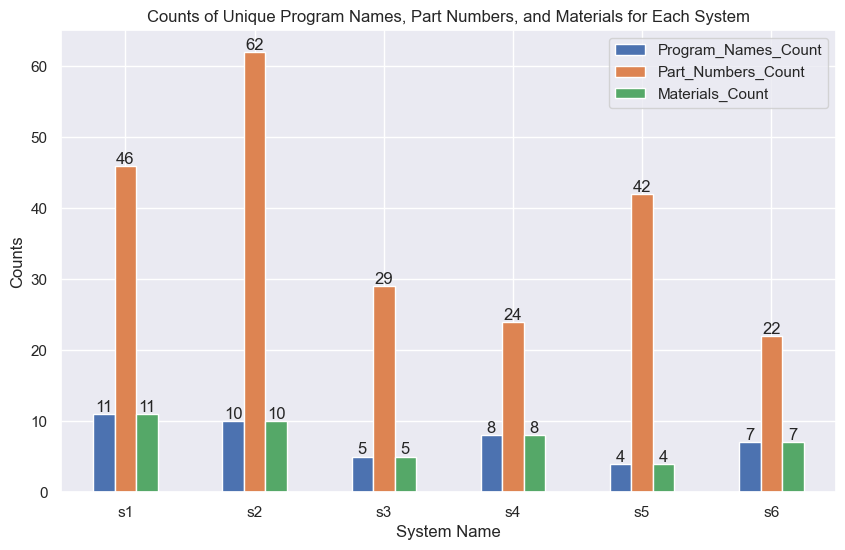

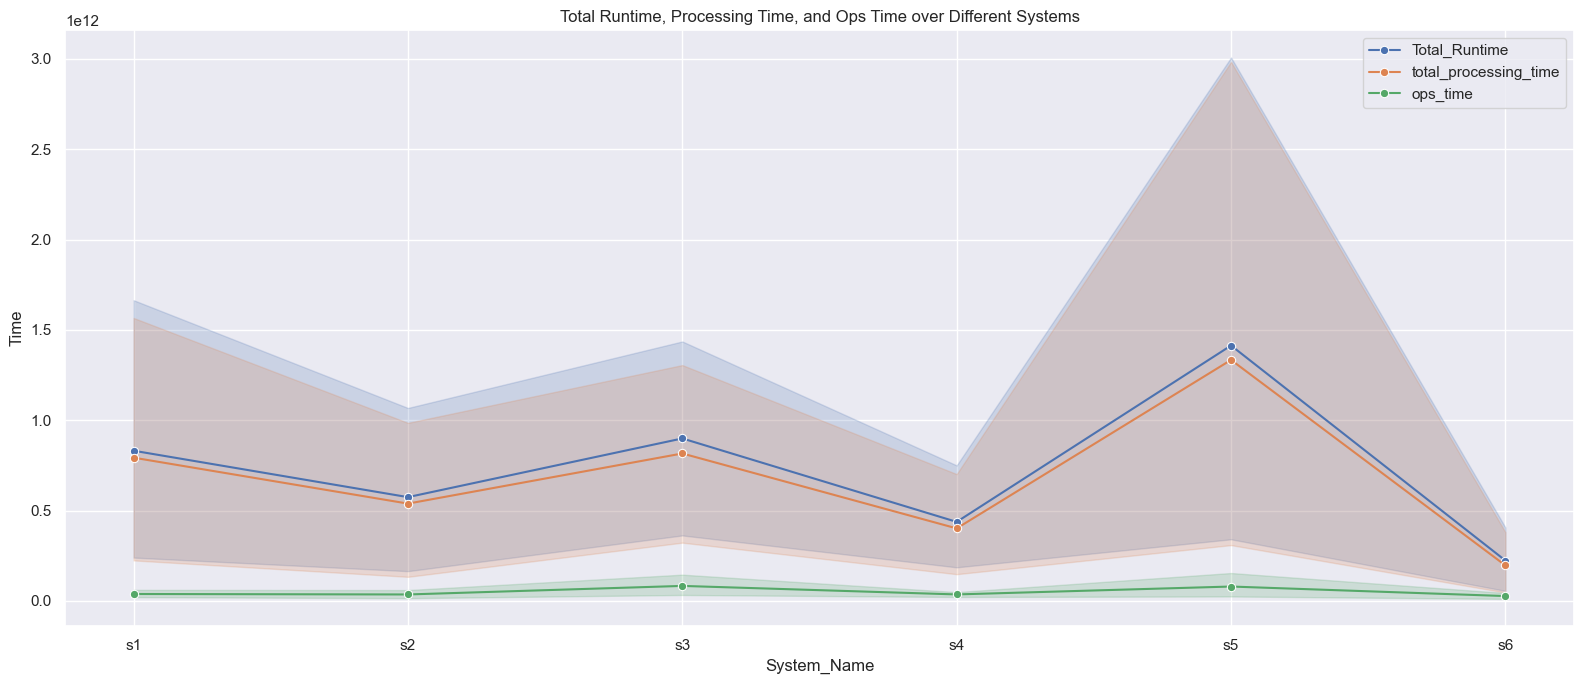

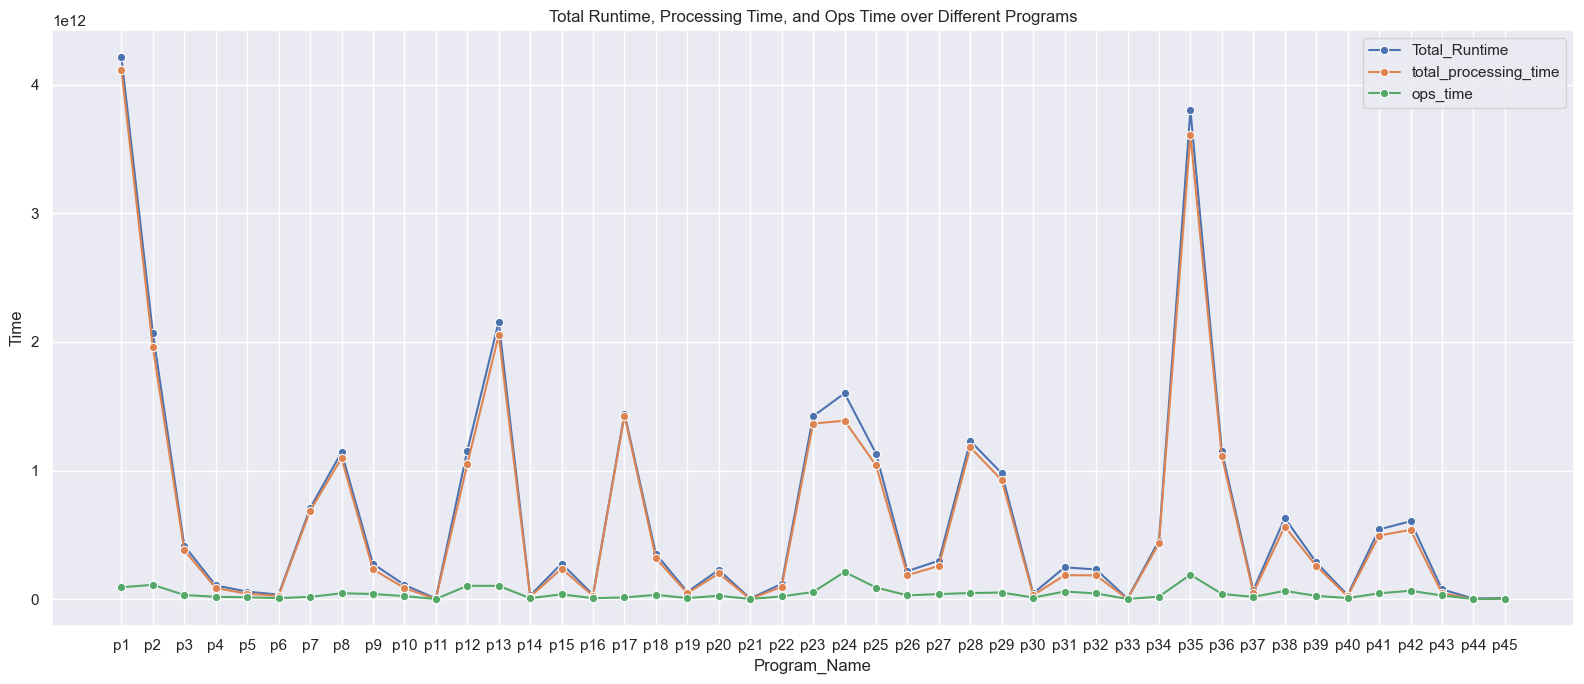

Correlation matrix:
+------+---------------+-----------------------+----------------------+
|      | Total_Runtime | total_processing_time | total_cutting_length |
+------+---------------+-----------------------+----------------------+
| 1.0  |      1.0      |         0.76          |         0.75         |
| 1.0  |      1.0      |         0.75          |         0.73         |
| 0.76 |     0.75      |          1.0          |         0.82         |
| 0.75 |     0.73      |         0.82          |         1.0          |
+------+---------------+-----------------------+----------------------+


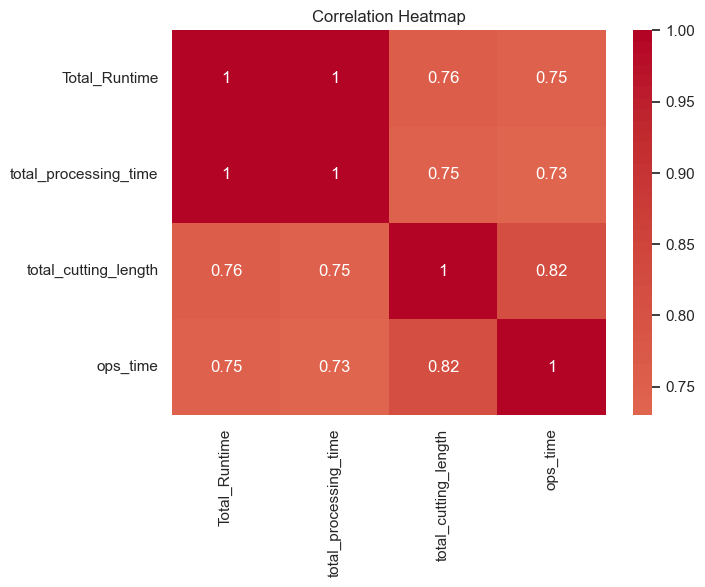

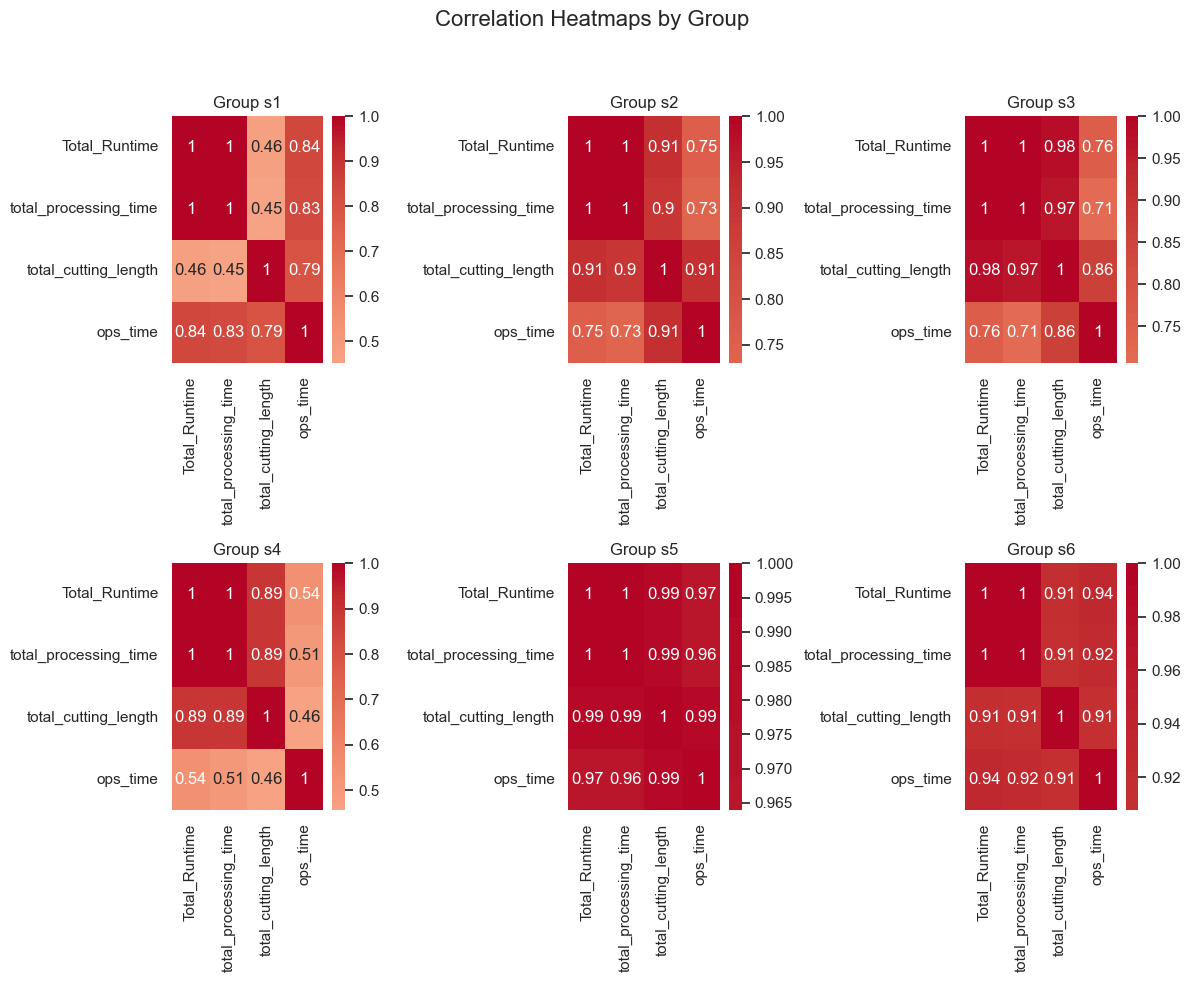

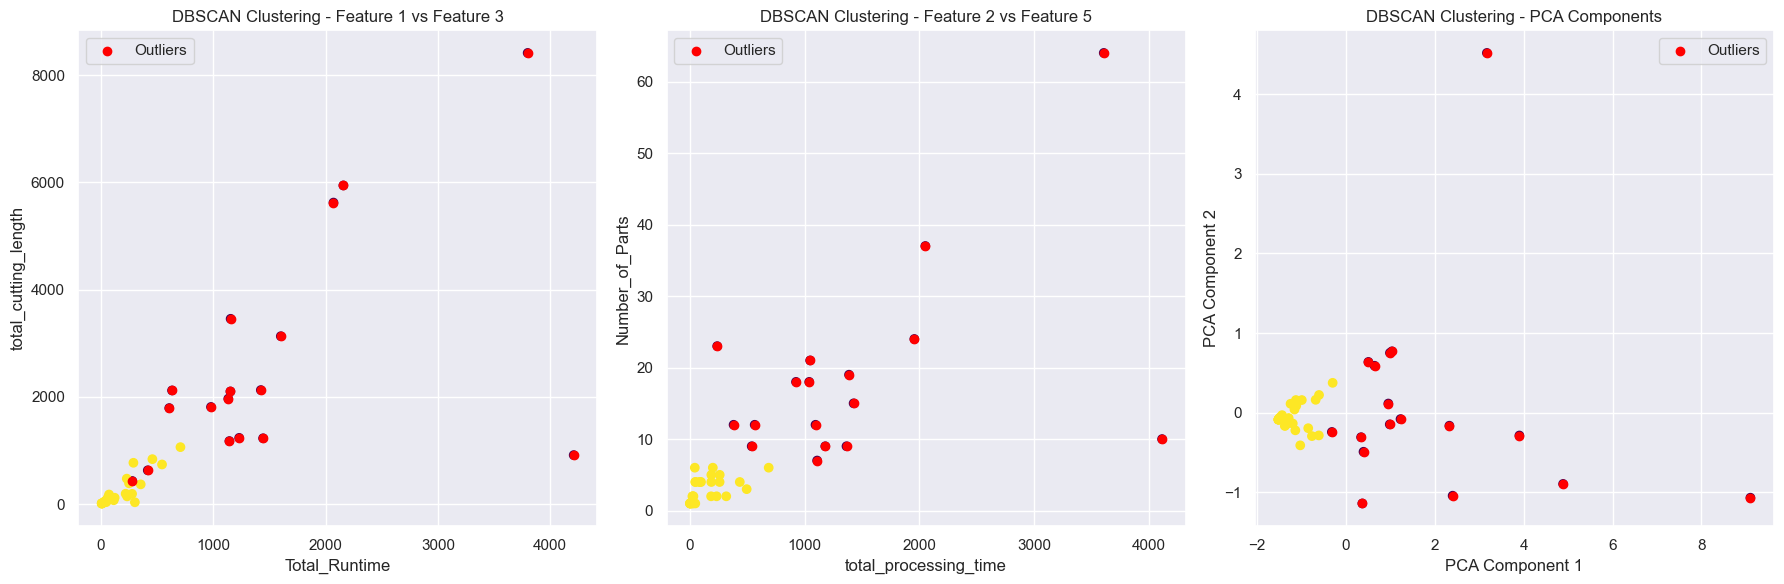

PCA Component 1 Coefficients:
                 Feature  Coefficient
2   total_cutting_length     0.458960
4        Number_of_Parts     0.457277
3               Part_no.     0.446945
0          Total_Runtime     0.438283
1  total_processing_time     0.434052
PCA Component 2 Coefficients:
                 Feature  Coefficient
1  total_processing_time     0.562877
0          Total_Runtime     0.539858
3               Part_no.    -0.453814
4        Number_of_Parts    -0.330627
2   total_cutting_length    -0.276518

Interpretation of PCA:
The first component (PCA Component 1) captures the most variance in the data
It represents a linear combination of the original features in such a way that maximizes the variance.
The second component (PCA Component 2) captures the second most variance, and so on.
The scatter plot of the reduced features shows how data points are projected onto the first two principal components.
Clusters or patterns in the original data might be preserved or emphasized in

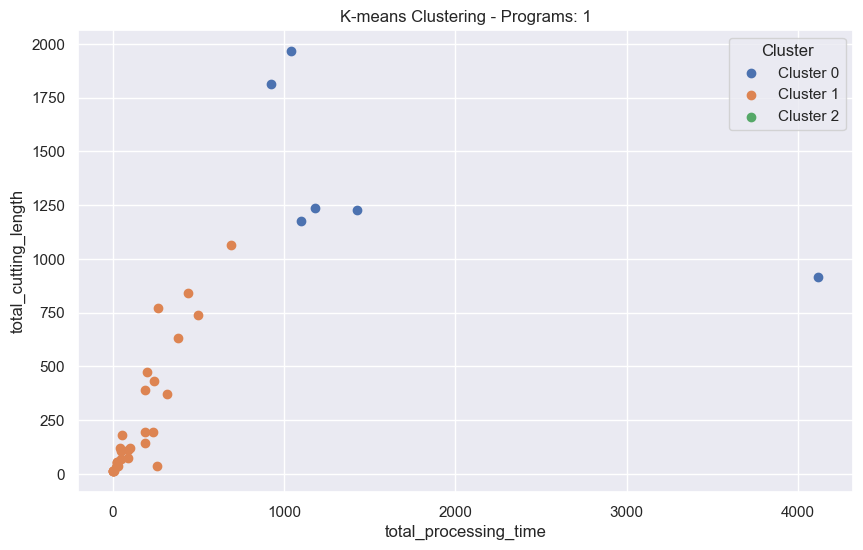

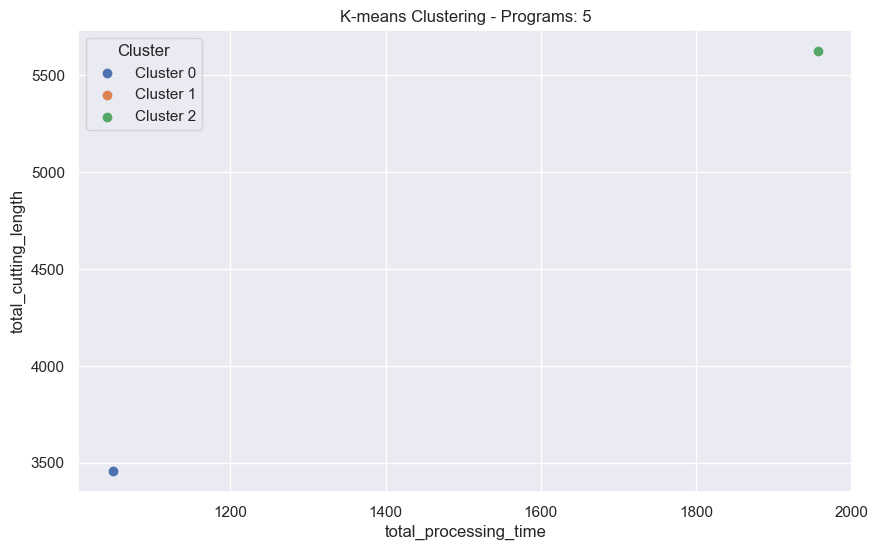

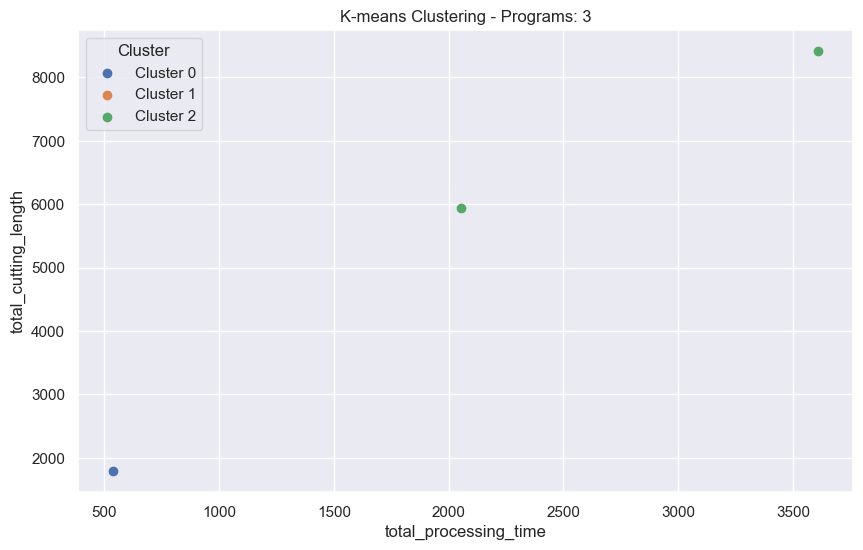

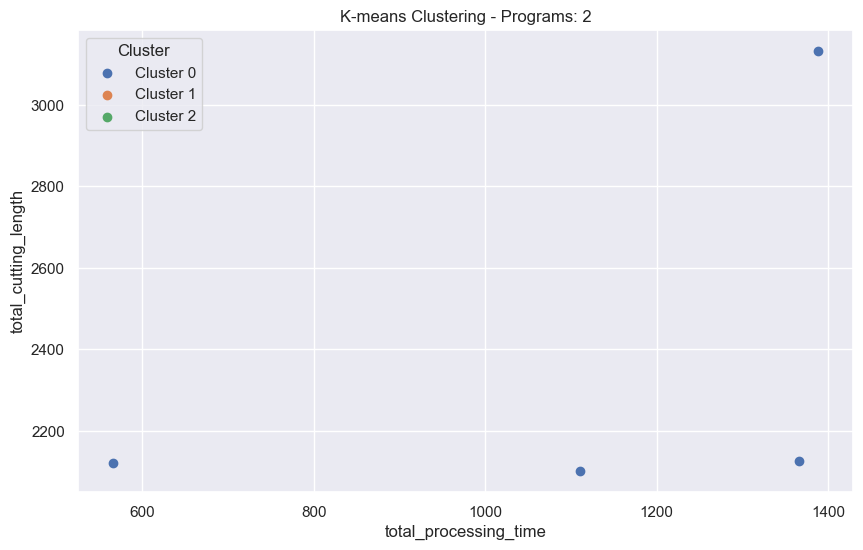

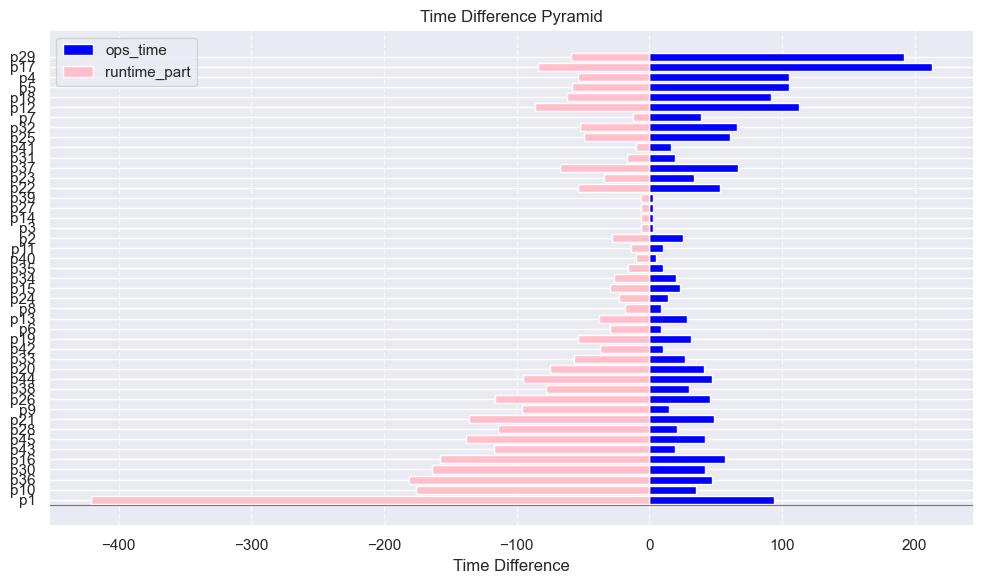

tree map construction for various programs


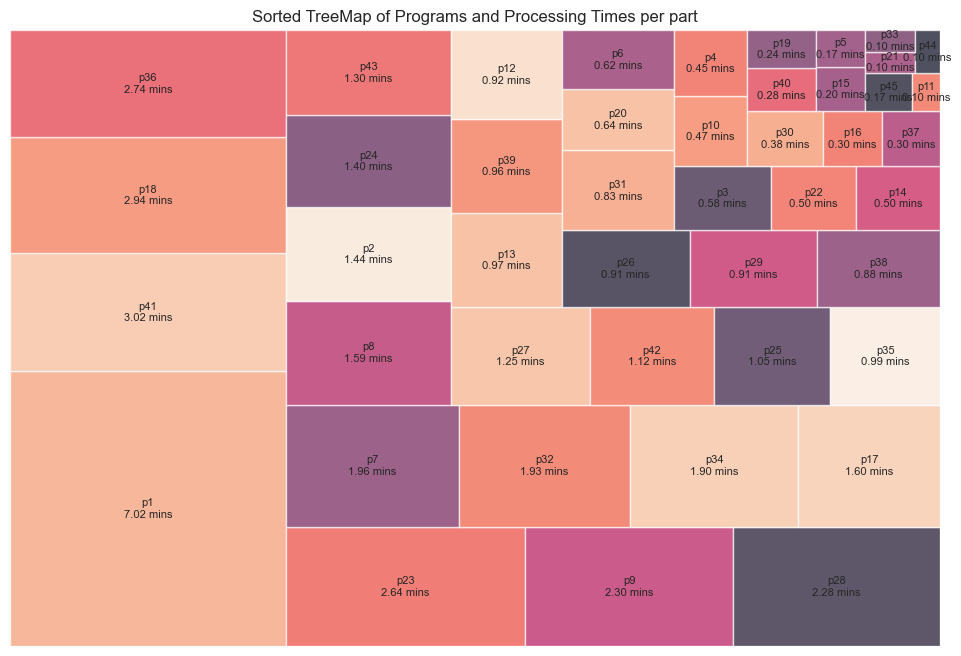

production_capacity_per_system = number_of_systems*processing_time_per_sys 
	+ material_handling_time*number_different_materials * factor_material_handling 
	+ sheet_change_time * number_of_programs * factor_sheet_change


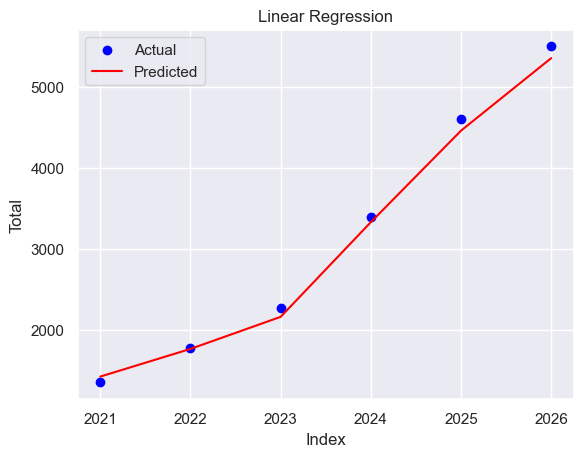

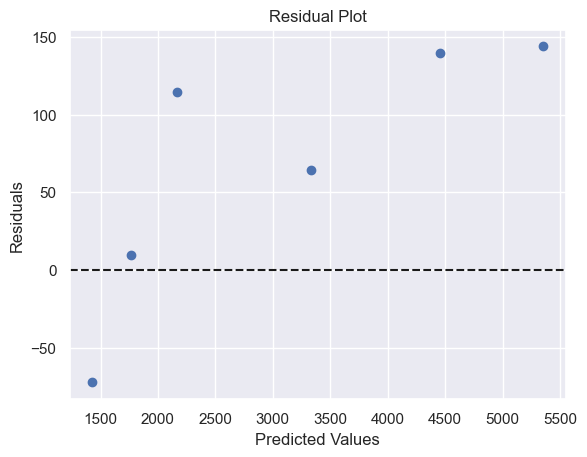

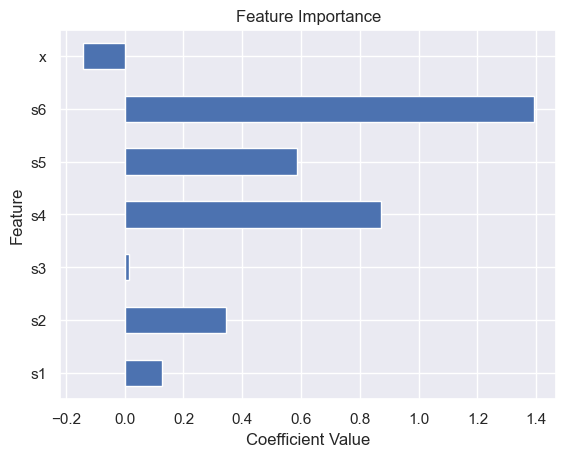

Coefficients: [0.12779693994870422, 0.34580348456708243, 0.01503493411161228, 0.8720261784735122, 0.5863624303528789, 1.390731405324136, -0.14283187406031667]
Intercept: 5.003979835499877
mean square error: 10463.701619340458
Cross-Validation MSE Scores: [ 6320.57647276 12779.3506335 ]
Average Cross-Validation MSE: 9549.963553132773


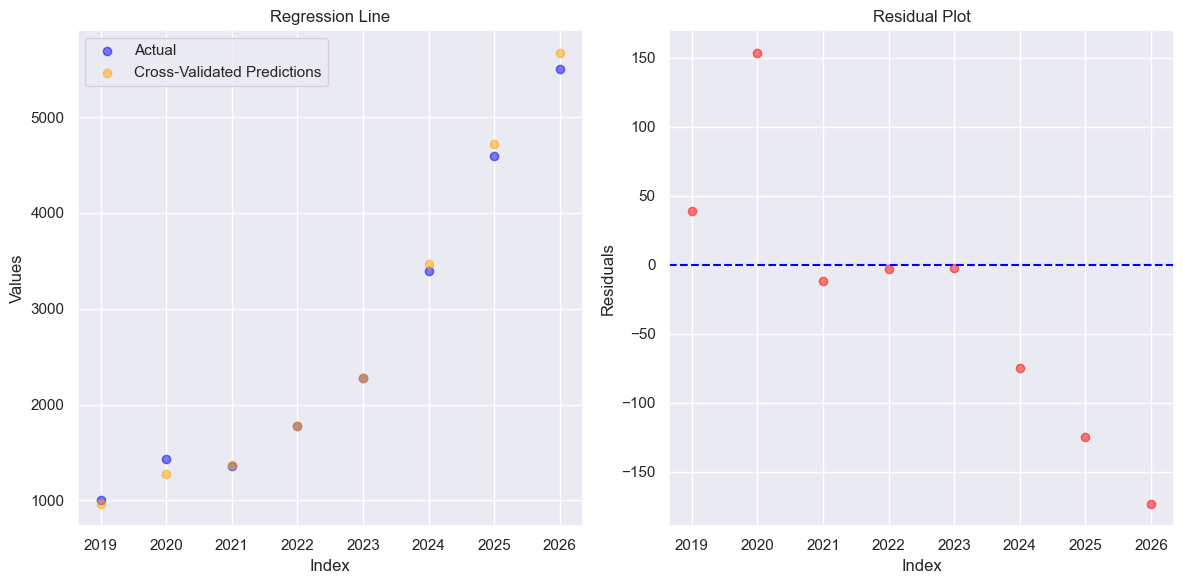

Feature Coefficients:
s1: 0.9923021726416826
s2: 0.623895553278292
s3: -1.757774809186942
s4: 1.499920502545619
s5: -0.7909802695667199
s6: 1.4630440027935703


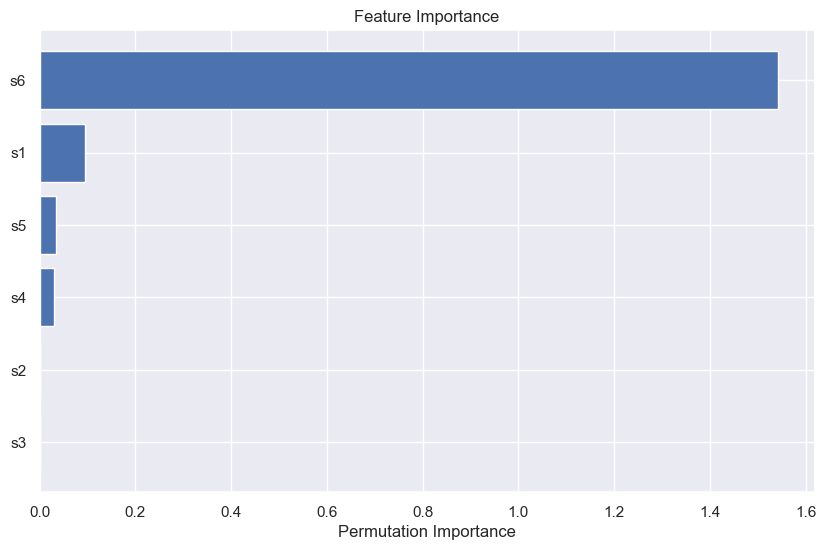

no of systems: 6
no of programs: 45
no of parts: 225
Total available time for production: 4298 hrs
Total processing time for the year 2022: 982.9847222222222 hrs
Total run time for the year 2022: 1683.9280555555556 hrs

total time required for production in 2022 considering material handling time: 13649.185042735044 hrs


+-------------+---------------------+--------------------+-----------------+--------------------+----------------------+
| System_Name | Program_Names_Count | Part_Numbers_Count | Materials_Count |   2022_run_time    | 2022_processing_time |
+-------------+---------------------+--------------------+-----------------+--------------------+----------------------+
|     s1      |        11.0         |        46.0        |      11.0       | 622.4361111111111  |  270.65694444444443  |
|     s2      |        10.0         |        62.0        |      10.0       |      23.9375       |  13.216666666666667  |
|     s3      |         5.0         |        29.0        |       5.0   

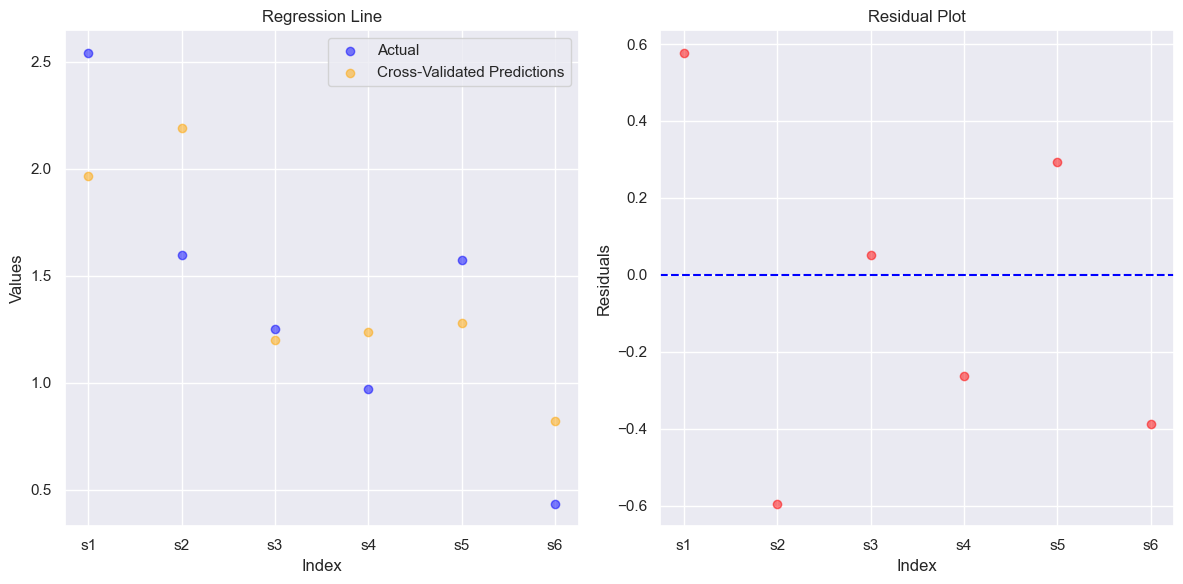

Feature Coefficients:
coeff: -2.837371899550203e-16
runtime_hrs: 0.9999999999999998
sheet_change_hrs: 6.772887198222783e-16
mat_change_hrs: 4.1875667148258305e-17


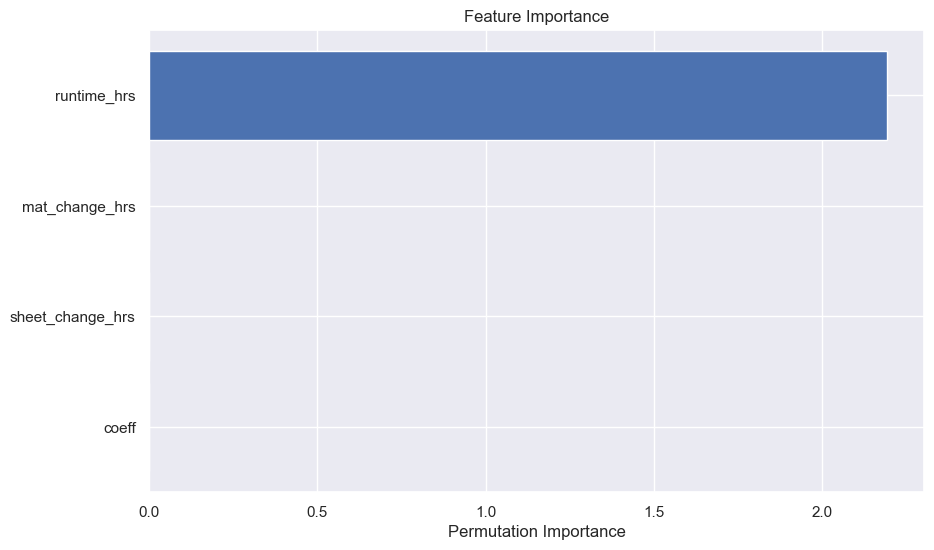

*******************************************************************************
future state data
no of systems: 1
no of programs: 44
no of parts: 224


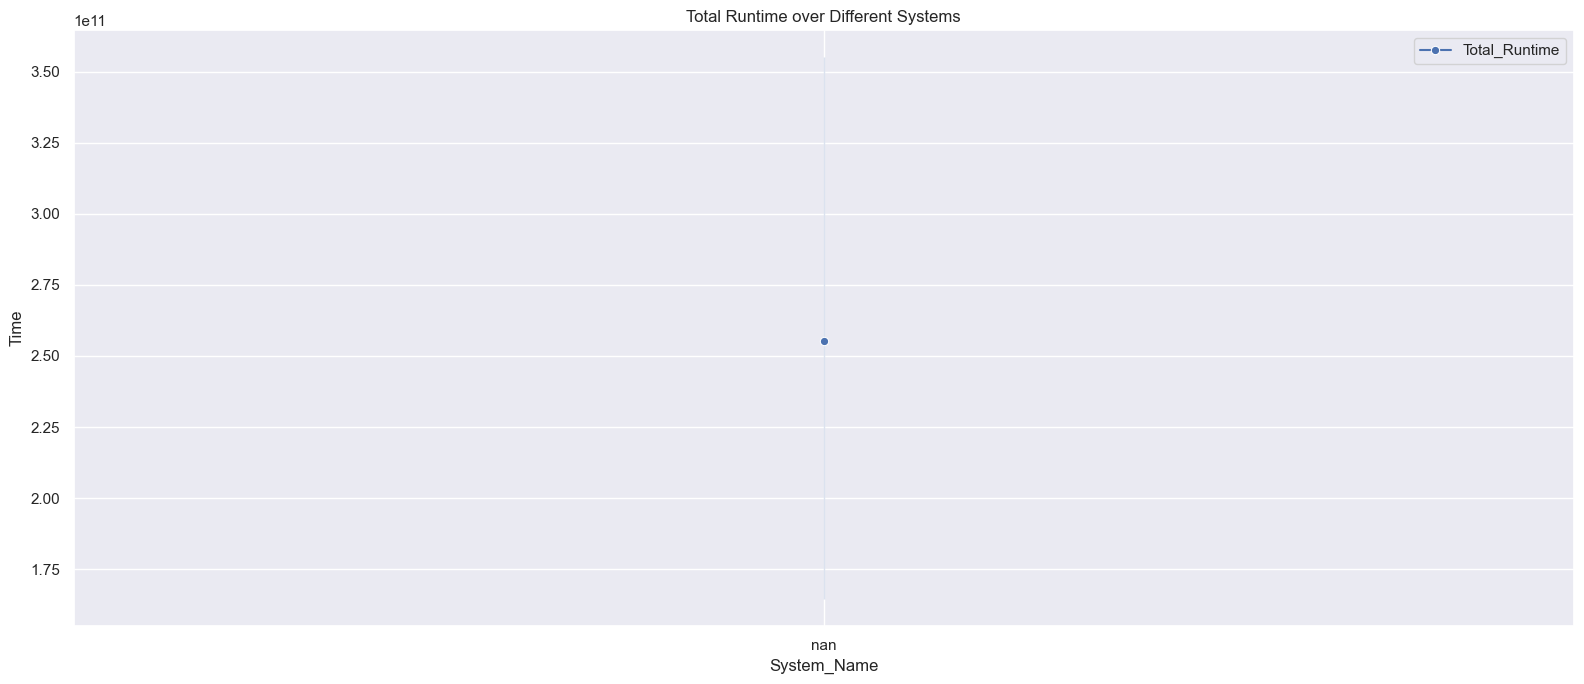

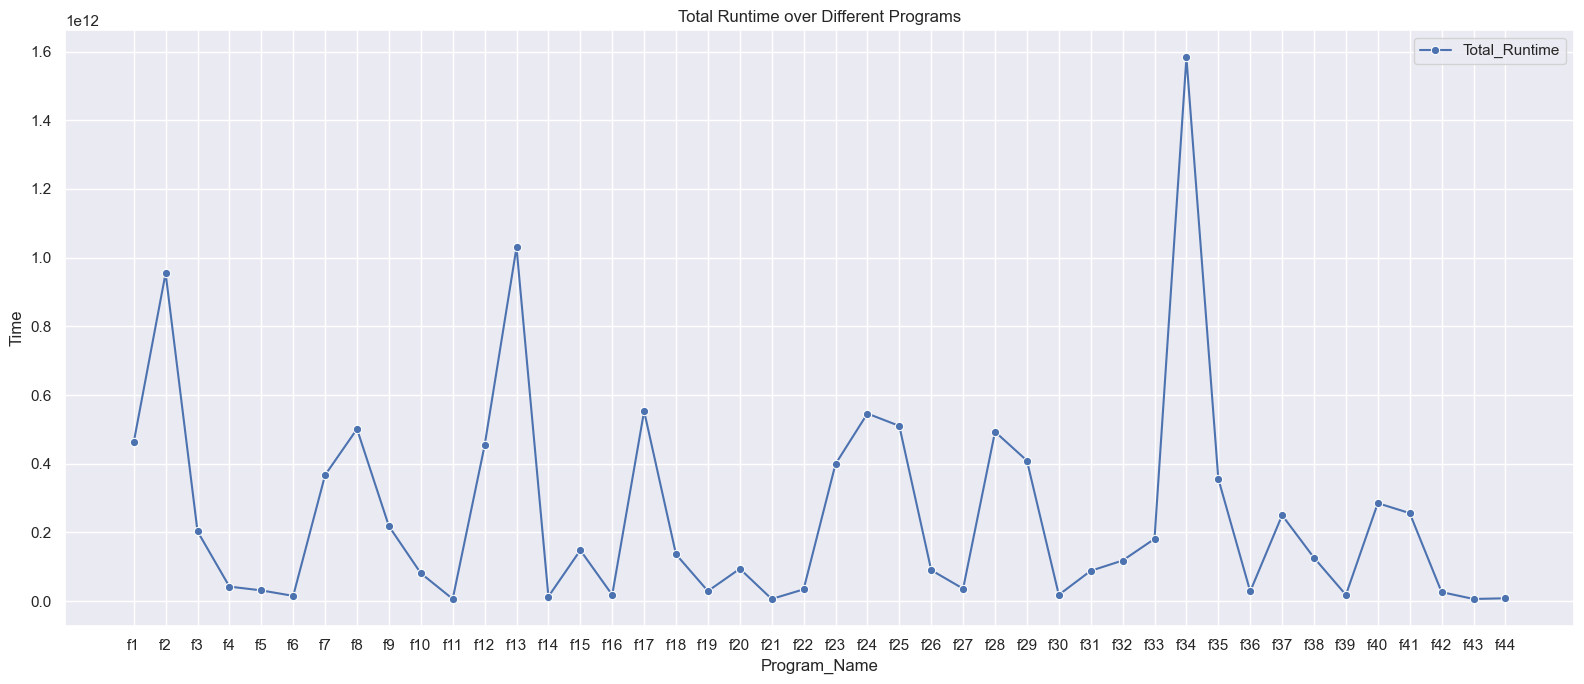

*******************************************************************************
                coeff  runtime_hrs  sheet_change_hrs  mat_change_hrs  factorization    target
System_Name                                                                                  
s1           0.127797     2.540556          1.797685        6.407564       0.324675  2.540556
s2           0.345803     1.595833          1.634259        8.751795       0.551845  1.595833
s3           0.015035     1.249167          0.817130        4.219615       0.018781  1.249167
s4           0.872026     0.972222          1.307407        3.516346       0.847803  0.972222
s5           0.586362     1.570833          0.653704        6.798269       0.921078  1.570833
s6           1.390731     0.434722          1.143981        1.719103       0.604582  0.434722
*******************************************************************************
various_systems   s1   s2  s3   s4   s5    s6   x  Total
2019              60  104  20  

In [22]:
import numpy as np
import pandas as pd
import os
import time
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import math
import squarify
import pulp

from tabulate import tabulate
from collections import Counter

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance

%matplotlib inline
%config IPCompleter.greedy = True

# Set max rows to None to display all rows without truncation
pd.set_option('display.max_rows', None)

# path created to store intermediate files for review 
path = os.getcwd() + os.sep + "intermediate_files"

# Define the custom aggregation function to count unique items in columns
def count_unique_items(series):
    return series.nunique()

# custom sort function defined to sort program names in a dataframe  sequentially
def custom_sort(value):
    if isinstance(value, str):
        try:
            return int(value[1:])
        except ValueError:
            return 0
    else:
        return value
#pspiv.sort_index(key = lambda x: x.map(custom_sort), inplace = True)

# functions for creating pivot tables
def ps_piv(df):
    df = pd.pivot_table( df, values = ['Processing_Time_(h:mm:ss)','Cutting_Length_(in)'], 
                        index = ['System_Name','Program_Name','Total_Runtime','Number_of_Parts'], aggfunc = 'sum')
    df.sort_index(level = 'Program_Name',key = lambda x: x.map(custom_sort), inplace = True)
    df.index = df.index.set_levels(df.index.levels[3].astype(int),level = 3)
    return df
#pspiv2 = ps_piv(ps)

def fs_piv(df):
    df = pd.pivot_table( df, values = ['Total_Runtime','Duration_(h:mm:ss)','Pieces'], 
                        index = ['System_Name','Program_Name'], aggfunc = 'sum')
    df.sort_index(level = 'Program_Name',key = lambda x: x.map(custom_sort), inplace = True)
    #df.index = df.index.set_levels(fs.index.levels[4].astype(int),level = 4)
    return df
#pspiv2 = fs_piv(ps)

def replace_spaces_with_underscore(df):
    # Get the current column names
    current_columns = df.columns
    
    # Replace spaces with underscores in the column names
    new_columns = [col.replace(' ', '_') for col in current_columns]
    
    # Update the DataFrame with the new column names
    df.columns = new_columns
    
    return df

# Convert alphanumeric indices to numeric
def convert_alphanumeric_to_numeric(index_value):
    if isinstance(index_value, str) and index_value.isalnum():
        return int(''.join(filter(str.isdigit, index_value)))
    return index_value

def clean_and_convert_to_numeric(df, columns):
    """
    Clean and convert specified columns in a DataFrame to numeric types.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the columns to be cleaned and converted.
    columns (list): List of column names to be cleaned and converted.
    
    Returns:
    pd.DataFrame: A new DataFrame with specified columns cleaned and converted to numeric types.
    """
    cleaned_df = df.copy()  # Create a copy of the input DataFrame
    
    for col in columns:
        cleaned_df[col] = cleaned_df[col].str.replace('\xa0', '').str.replace(',', '').astype(float)
    
    return cleaned_df

def create_lineplot(data, x_column, y_columns, x_label, y_label, title, reversed_ylim=True):
    plt.figure(figsize=(16, 7))
    
    for y_col in y_columns:
        sns.lineplot(data=data, x=x_column, y=y_col, marker='o', label=y_col)
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    if reversed_ylim:
        plt.ylim(reversed(plt.ylim()))
    
    plt.legend()
    plt.tight_layout()
    plt.show()
    

def visualize_dbscan_and_pca(df):
    """
    Visualize DBSCAN clustering and PCA analysis.
    
    Parameters:
        df (DataFrame): Input DataFrame.
    """
    # Convert timedelta columns to seconds
    df_mod = df.apply(lambda col: col.dt.total_seconds() if pd.api.types.is_timedelta64_dtype(col) else col)
    
    # Extract features for clustering
    features = df_mod[['Total_Runtime','total_processing_time', 'total_cutting_length','Part_no.','Number_of_Parts']]
    
    # Scale the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    
    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    labels = dbscan.fit_predict(scaled_features)
    
    outliers_mask = labels == -1
    
    # Add cluster labels to the DataFrame
    df_mod['Cluster'] = labels
    
    # Perform PCA for dimensionality reduction
    pca = PCA(n_components=3)
    reduced_features = pca.fit_transform(scaled_features)
    
    # Plot DBSCAN results
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Scatter plot of two features for DBSCAN clustering
    axes[0].scatter(df_mod['Total_Runtime'], df_mod['total_cutting_length'], c=labels, cmap='viridis')
    axes[0].scatter(df_mod.loc[outliers_mask, 'Total_Runtime'], df_mod.loc[outliers_mask, 'total_cutting_length'], color='red', label='Outliers')
    axes[0].set_xlabel('Total_Runtime')
    axes[0].set_ylabel('total_cutting_length')
    axes[0].set_title('DBSCAN Clustering - Feature 1 vs Feature 3')
    axes[0].legend()
    
    axes[1].scatter(df_mod['total_processing_time'], df_mod['Number_of_Parts'], c=labels, cmap='viridis')
    axes[1].scatter(df_mod.loc[outliers_mask, 'total_processing_time'], df_mod.loc[outliers_mask, 'Number_of_Parts'], color='red', label='Outliers')
    axes[1].set_xlabel('total_processing_time')
    axes[1].set_ylabel('Number_of_Parts')
    axes[1].set_title('DBSCAN Clustering - Feature 2 vs Feature 5')
    axes[1].legend()
    
    # Scatter plot of PCA components
    axes[2].scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis')
    axes[2].scatter(reduced_features[outliers_mask, 0], reduced_features[outliers_mask, 1], color='red', label='Outliers')
    axes[2].set_xlabel('PCA Component 1')
    axes[2].set_ylabel('PCA Component 2')
    axes[2].set_title('DBSCAN Clustering - PCA Components')
    axes[2].legend()
    
    plt.tight_layout()
    plt.show()

    # Access PCA components
    pca_components = pca.components_

    # Get the coefficients of the first and second principal components
    pca_component_1 = pca_components[0]
    pca_component_2 = pca_components[1]

    # Create a DataFrame to show the feature names and their coefficients in PCA components
    feature_names = features.columns
    pca_component_1_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': pca_component_1})
    pca_component_2_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': pca_component_2})

    # Sort the DataFrames by absolute coefficient values
    pca_component_1_df = pca_component_1_df.reindex(pca_component_1_df['Coefficient'].abs().sort_values(ascending=False).index)
    pca_component_2_df = pca_component_2_df.reindex(pca_component_2_df['Coefficient'].abs().sort_values(ascending=False).index)

    print("PCA Component 1 Coefficients:")
    print(pca_component_1_df)

    print("PCA Component 2 Coefficients:")
    print(pca_component_2_df)
    return pca_component_1_df,pca_component_2_df
    

def generate_pyramid_plot(programs_list, time_operations, time_run_part):
    # Sort programs by the difference between ops_time and runtime_part
    sorted_indices = sorted(range(len(programs_list)), key=lambda k: time_operations[k] - time_run_part[k])

    # Create a figure and axis with adjusted width
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the Ops time as a bar chart on the left side
    ax.barh([programs_list[i] for i in sorted_indices], [time_operations[i] for i in sorted_indices], color='blue', label='ops_time')

    # Plot the runtime_part as a bar chart on the right side with negative values for horizontal positioning
    ax.barh([programs_list[i] for i in sorted_indices], [-time_run_part[i] for i in sorted_indices], color='pink', label='runtime_part')

    # Customize the appearance
    ax.set_xlabel('Time Difference')
    ax.set_title('Time Difference Pyramid')
    ax.legend()
    ax.grid(True, axis='x', linestyle='--', alpha=0.7)

    # Add horizontal lines to separate bars
    ax.axhline(y=-0.5, color='black', linewidth=0.8, alpha=0.5)

    # Show the plot
    plt.tight_layout()
    plt.show()
    
def create_treemap(df):
    programs = df['Program_Name']
    processing_times = df['runtime_part']

    # Normalize processing times to fit the TreeMap
    total_processing_time = sum(processing_times)
    normalized_processing_times = [time / total_processing_time for time in processing_times]

    # Sort data by processing times in descending order
    sorted_data = sorted(zip(programs, normalized_processing_times), key=lambda x: x[1], reverse=True)
    sorted_programs, sorted_normalized_times = zip(*sorted_data)

    # Create the TreeMap
    plt.figure(figsize=(12, 8))
    squarify.plot(sizes=sorted_normalized_times, label=None, alpha=0.7)
    plt.axis('off')  # Turn off axis
    plt.title("Sorted TreeMap of Programs and Processing Times per part")

    # Manually add labels with desired font size
    label_fontsize = 8
    for i, program in enumerate(sorted_programs):
        size = sorted_normalized_times[i]
        processing_time_in_minutes = size * total_processing_time / 60  # Convert to minutes
        x, y, width, height = plt.gca().patches[i].get_bbox().bounds
        label = f"{program}\n{processing_time_in_minutes:.2f} mins"  # Display processing time in minutes
        plt.text(x + width / 2, y + height / 2, label, fontsize=label_fontsize, ha="center", va="center")
        
    plt.show()

def plot_clusters(df, feature_columns, cluster_column, system_column, num_clusters=3):
    # Convert timedelta columns to seconds
    df_mod = df.apply(lambda col: col.dt.total_seconds() if pd.api.types.is_timedelta64_dtype(col) else col)
    
    # Extract features for clustering
    features = df_mod[feature_columns]

    # Scale the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)  # Explicitly set n_init
    labels = kmeans.fit_predict(scaled_features)

    # Add cluster labels to the DataFrame
    df_mod[cluster_column] = labels

    # Get unique system names
    unique_systems = df_mod[system_column].unique()

    # Create scatter plots for each system
    for system in unique_systems:
        plt.figure(figsize=(10, 6))
        
        # Filter data for the current system and cluster
        system_df = df_mod[(df_mod[system_column] == system) & (df_mod[cluster_column] != -1)]
        
        # Create scatter plots for each cluster within the system
        for cluster_id in range(num_clusters):
            cluster_data = system_df[system_df[cluster_column] == cluster_id]
            plt.scatter(cluster_data[feature_columns[0]], cluster_data[feature_columns[1]], label=f'Cluster {cluster_id}')
        
        plt.xlabel(feature_columns[0])
        plt.ylabel(feature_columns[1])
        plt.title(f'K-means Clustering - {system_column}: {system}')
        
        # Add legend
        plt.legend(title='Cluster')
        plt.show()

# Define a formatting function to round to two decimal places
def format_to_two_decimal_places(value):
    return round(value, 2)     
        
        
        

def perform_linear_regression(data, feature_columns, target_column, num_train_samples):
    """
    Perform linear regression, make predictions, calculate MSE, and visualize the regression line.
    
    Parameters:
    data (pd.DataFrame): The DataFrame containing the data.
    feature_columns (list): List of column names for features.
    target_column (str): Name of the target column.
    num_train_samples (int): Number of samples for training.
    
    Returns:
    float: Mean Squared Error (MSE) of the predictions.
    """
    # Separate features and target
    X = data[feature_columns]
    y = data[target_column]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = X[:num_train_samples], X[num_train_samples:], y[:num_train_samples], y[num_train_samples:]

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Plot the data points and the regression line
    plt.scatter(y_test.index, y_test, color='blue', label='Actual')
    plt.plot(y_test.index, y_pred, color='red', label='Predicted')
    plt.xlabel('Index')
    plt.ylabel(target_column)
    
    # Set integer index values as x-axis ticks
    plt.xticks(y_test.index, y_test.index.astype(int))
    
    plt.legend()
    plt.title('Linear Regression')
    plt.show()

    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.axhline(y=0, color='k', linestyle='--')
    plt.title("Residual Plot")
    plt.show()
     
    feature_importance = pd.Series(model.coef_, index=feature_columns)
    feature_importance.plot(kind='barh')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.title("Feature Importance")
    plt.show()
    
    
    return model, mse




def perform_linear_regression_with_cross_val(data, feature_columns, target_column):
    """
    Perform linear regression with cross-validation, visualize the regression line, residual plot, 
    feature importance, and feature coefficients.
    
    Parameters:
    data (pd.DataFrame): The DataFrame containing the data.
    feature_columns (list): List of column names for features.
    target_column (str): Name of the target column.
    """
    # Separate features and target
    X = data[feature_columns]
    y = data[target_column]

    # Create the linear regression model
    model = LinearRegression()

    # Perform cross-validation and calculate MSE scores
    cross_val_mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=2)
    cross_val_mse_scores = -cross_val_mse_scores
    print("Cross-Validation MSE Scores:", cross_val_mse_scores)
    average_mse = cross_val_mse_scores.mean()
    print("Average Cross-Validation MSE:", average_mse)

    # Generate cross-validated predictions
    cross_val_predictions = cross_val_predict(model, X, y, cv=2)

    # Plot the actual values against cross-validated predictions with index on the x-axis
    plt.figure(figsize=(12, 6))
    
    # Regression Line
    plt.subplot(1, 2, 1)
    plt.scatter(data.index, y, color='blue', label='Actual', alpha=0.5)
    plt.scatter(data.index, cross_val_predictions, color='orange', label='Cross-Validated Predictions', alpha=0.5)
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend()
    plt.title('Regression Line')

    # Residual Plot
    plt.subplot(1, 2, 2)
    residuals = y - cross_val_predictions
    plt.scatter(data.index, residuals, color='red', alpha=0.5)
    plt.axhline(y=0, color='blue', linestyle='--')
    plt.xlabel('Index')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')

    plt.tight_layout()
    plt.show()

    # Fit the model on the entire dataset to get coefficients
    model.fit(X, y)
    
    # Print or return the coefficients for each feature
    feature_coefficients = dict(zip(feature_columns, model.coef_))
    print("Feature Coefficients:")
    for feature, coefficient in feature_coefficients.items():
        print(f"{feature}: {coefficient}")

    # Calculate feature importance
    feature_importance = permutation_importance(model, X, y, n_repeats=30, random_state=0)

    # Plot feature importance
    sorted_idx = feature_importance.importances_mean.argsort()
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), feature_importance.importances_mean[sorted_idx])
    plt.yticks(range(len(sorted_idx)), np.array(feature_columns)[sorted_idx])
    plt.xlabel('Permutation Importance')
    plt.title('Feature Importance')
    plt.show()

# Example usage:
# perform_linear_regression_with_cross_val(data, feature_columns, target_column)

def solve_lp_problem(lowBound_values, coefficients, constraints):
    # Define decision variable names
    variable_names = ['s1', 's2', 's3', 's4', 's5', 's6']

    # Create a LP problem for this set of lowBound values
    lp_problem = pulp.LpProblem("My_LP_Problem", pulp.LpMaximize)

    # Define decision variables with the given lowBound values
    decision_variables = {var_name: pulp.LpVariable(var_name, lowBound=lb) for var_name, lb in zip(variable_names, lowBound_values)}

    # Update the objective function with the provided coefficients
    lp_problem += pulp.lpSum(coeff * decision_variables[var_name] for coeff, var_name in zip(coefficients, variable_names))

    # Add constraints based on the provided constraints
    for constraint in constraints:
        coefficients, relation_str, rhs = constraint
        if relation_str == "<=":
            lp_problem += pulp.lpSum(coefficients[i] * decision_variables[var_name] for i, var_name in enumerate(variable_names)) <= rhs
        elif relation_str == ">=":
            lp_problem += pulp.lpSum(coefficients[i] * decision_variables[var_name] for i, var_name in enumerate(variable_names)) >= rhs
        elif relation_str == "==":
            lp_problem += pulp.lpSum(coefficients[i] * decision_variables[var_name] for i, var_name in enumerate(variable_names)) == rhs

    # Solve the problem
    lp_problem.solve()

    # Check status and get optimal values
    if pulp.LpStatus[lp_problem.status] == "Optimal":
        # Get optimal values and objective value
        optimal_values = {var.name: var.varValue for var in lp_problem.variables()}
        optimal_objective_value = pulp.value(lp_problem.objective)
        return {"lowBound_values": lowBound_values, "optimal_values": optimal_values, "objective_value": optimal_objective_value}
    else:
        return {"lowBound_values": lowBound_values, "optimal_values": None, "objective_value": None}

# Example usage of the function
# lowBound_values = lists_per_row[0]
# coefficients = rt_coeff.to_list()
# constraints = [(rt_coeff.to_list(), "<=", ps_available_time), (model_coeff.to_list(), "<=", data_for_record.at[2019,'Total'])]


# result = solve_lp_problem(lowBound_values, coefficients, constraints)
# print("Optimization Result:")
# print("LowBound Values:", result["lowBound_values"])
# print("Optimal Values:", result["optimal_values"])
# print("Optimal Objective Value:", result["objective_value"] )


# enabling the code to look in to archive folder for datafiles to reduce clutter in the present working directory
source = os.getcwd() + os.sep + 'Archive' + os.sep
pd.options.display.max_rows = None

# reading present state and future state data from excel sheets and reading to ps & fs dataframes
ps = pd.read_excel(source + 'working_copy.xlsx',sheet_name = "present_state")
fs = pd.read_excel(source + 'working_copy.xlsx',sheet_name = "future_state")

# renaming sheet name column to system name as per the data 
ps.columns = ps.columns.str.replace('Sheet_Name','System_Name')
fs.columns = fs.columns.str.replace('Sheet_Name','System_Name')

# forward fill of system name & program name for all rows
ps["System_Name"] = ps["System_Name"].ffill()
fs["System_Name"] = fs["System_Name"].ffill()
ps["Program Name"] = ps["Program Name"].ffill()
fs["Program Name"] = fs["Program Name"].ffill()

# Identifying unique system names and replacing them with s1,s2......
ps_sys = pd.Series({x: ps[x].unique() for x in ps})
fs_sys = pd.Series({x: fs[x].unique() for x in fs})
#ps.loc[:,'System_Name'] = ps['System_Name'].replace(to_replace = ps_sys[0],value = ["s1","s2","s3","s4","s5",'s6'])
#ps.loc[:, 'System_Name'] = ps['System_Name'].replace(to_replace=ps_sys[0], value=["s1", "s2", "s3", "s4", "s5", 's6'])
#mapping = dict(zip(ps_sys[0], ["s1", "s2", "s3", "s4", "s5", 's6']))
mapping = dict(zip(ps_sys.iloc[0], ["s1", "s2", "s3", "s4", "s5", 's6']))
ps.loc[:, 'System_Name'] = ps['System_Name'].map(mapping)


mapping2 = dict(zip(fs_sys.iloc[0], ["s1", "s2", "s3", "s4", "s5", 's6']))
fs.loc[:, 'System_Name'] = ps['System_Name'].map(mapping2)

#fs.loc[:, 'System_Name'] = fs['System_Name'].replace(to_replace=fs_sys[0], value=["s1", "s2", "s3", "s4", "s5", 's6'])

#ps['System_Name'] = ps['System_Name'].replace(to_replace = ps_sys[0], value = ["s1","s2","s3","s4","s5",'s6'])
#fs['System_Name'] = fs['System_Name'].replace(to_replace = fs_sys[0], value = ["s1","s2","s3","s4","s5",'s6'])


print('\n -------------------------')
print("\nUnique system names for present state .......")

# printing system names and program names
# for item in ps_sys[0]:
#     print(item)

# print("\nUnique system names for future state .......")   
# for item in fs_sys[0]:
#     print(item)

# Ensure all entries in 'System_Name' are strings
ps['System_Name'] = ps['System_Name'].astype(str)
fs['System_Name'] = fs['System_Name'].astype(str)

# Calculate the number of common systems
common_systems = np.intersect1d(fs['System_Name'], ps['System_Name'])
print('Number of common systems between present state and future state:', len(common_systems))



#print('Number of common systems between present state and future state:',
#      str(len(np.intersect1d(fs['System_Name'],ps['System_Name']))))
print('Both present state and future state have same systems')

print("\nNumber of programs in Present State:",len(Counter(ps['Program Name'])))
    
print("Number of programs in Future State:",len(Counter(fs['Program Name'])))


print('\nNumber of common programs between present state and future state:',
      str(len(np.intersect1d(fs['Program Name'],ps['Program Name']))))
    
print('\n -------------------------')

ps_prg = ['p'+str(x) for x in range(1,len(Counter(ps['Program Name']))+1)]
fs_prg = ['f'+str(x) for x in range(1,len(Counter(fs['Program Name']))+1)]

#Even though there are 33 common programs we are keeping them seperately to distinguish

#ps.loc[:, 'Program Name'] = ps['Program Name'].replace(to_replace=ps_sys[1], value=ps_prg)
#fs.loc[:, 'Program Name'] = fs['Program Name'].replace(to_replace=fs_sys[1], value=fs_prg)


ps.loc[:, 'Program Name'] = ps['Program Name'].replace(to_replace=ps_sys.iloc[1], value=ps_prg)
fs.loc[:, 'Program Name'] = fs['Program Name'].replace(to_replace=fs_sys.iloc[1], value=fs_prg)


#ps['Program Name'] = ps['Program Name'].replace(to_replace = ps_sys[1], value = ps_prg)
#fs['Program Name'] = fs['Program Name'].replace(to_replace = fs_sys[1], value = fs_prg)

# identifying time columns in the present state
ps_time_cols = ['Total Runtime','Duration (h:mm:ss)','Processing Time (h:mm:ss)']

for col in ps_time_cols:
    ps[col] = pd.to_timedelta(ps[col].apply(lambda x: str(x)))
    fs[col] = pd.to_timedelta(fs[col].apply(lambda x: str(x)))


# dropping columns processing time, cutting length and material as there is no data for the future state
fs = fs.dropna(axis=1, how = 'all')

ps = replace_spaces_with_underscore(ps)
fs = replace_spaces_with_underscore(fs)

# bringing in other data related to material handling and production forecast

projections = pd.read_excel( source + 'System_projections_expansion.xlsx')
projections.rename(columns={"Unnamed: 0": "various_systems"}, inplace=True)

# replacing various system names in the projections dataframe with the system names
replace_dict = {'Back of Cab - Tractor':'s1','Back of Cab - Truck':'s2',
               'Front of Body':'s3','Tail Mount':'s4',
               'Roof Mount':'s5','Side Mount':'s6',
               'Class 5-7 Side Mount':'x','Total Fuel Systems':'Total'}

projections['various_systems'] = projections['various_systems'].replace(replace_dict)

# dealing with s1 - s6 related to fabrication using laser selecting only those rows

projections_mod = projections.iloc[:8]
projections_mod.set_index(projections_mod.columns[0], inplace = True)
# please note that the projections_mod dataframe not returning data as expected. 


mat_change = pd.read_excel( source + 'Laser Material Change Data.xlsx')
mat_change = replace_spaces_with_underscore(mat_change)

sheet_change = pd.read_excel( source + 'Laser Sheet Change Data.xlsx')
sheet_change = replace_spaces_with_underscore(sheet_change)

mat_handling_time_min = mat_change['Material_Handling_Time'].mean()/60
sheet_change_time_min = sheet_change['Material_Handling_Time'].mean()/60


# working on present state file 
    
# for col in ps_time_cols:
#     ps_merged[col] = ps_merged[col].apply(lambda x: str(x)[8:] if str(x).startswith('0 days') else str(x))
ps['total_processing_time'] = ps['Pieces']*ps['Processing_Time_(h:mm:ss)']
ps['total_cutting_length'] = ps['Pieces']*ps['Cutting_Length_(in)']


ps_grp = ps.groupby(['System_Name','Program_Name']).agg({'Programs':'nunique','Part_no.':'nunique',
                                                         'Material':'nunique','Number_of_Parts':'sum','Total_Runtime':'sum',
                                                         'total_processing_time':'sum','total_cutting_length':'sum'})

# to access each group from the above groupby objects : PsGrpPrg.get_group('p41') 

ps_grp.sort_index(level = 'Program_Name',key = lambda x: x.map(custom_sort), inplace = True)


ps_grp_timecols = ['Total_Runtime', 'total_processing_time']

for col in ps_grp_timecols:
    ps_grp[col] = ps_grp[col].apply(lambda x: str(x)[8:] if str(x).startswith('0 days') else str(x))   

ps_grp['Total_Runtime'] = pd.to_timedelta(ps_grp['Total_Runtime'])
ps_grp['total_processing_time'] = pd.to_timedelta(ps_grp['total_processing_time'])
ps_grp['ops_time'] = ps_grp['Total_Runtime'] -ps_grp['total_processing_time']

ps_grp['Number_of_Parts'] = ps_grp['Number_of_Parts'].astype(int)


PsGrpSys = ps.groupby(['System_Name'])

# Calculate the number of unique program names, part numbers, and materials for each system
program_names_count = PsGrpSys['Program_Name'].nunique()
part_numbers_count = PsGrpSys['Part_no.'].nunique()
materials_count = PsGrpSys['Material'].nunique()

# Create a DataFrame to display the results
result1_df = pd.DataFrame({
    'System_Name': program_names_count.index,
    'Program_Names_Count': program_names_count.values,
    'Part_Numbers_Count': part_numbers_count.values,'Materials_Count': materials_count.values})

# Set 'System_Name' column as the index for better visualization
result1_df.set_index('System_Name', inplace=True)

# Set display options to avoid wrapping
pd.set_option('display.max_rows', None)      # Display all rows
pd.set_option('display.max_columns', None)   # Display all columns
pd.set_option('display.width', 200)         # Set width to fit content

print('\n')
print(tabulate(result1_df, headers='keys', tablefmt='pretty'))
print('\n')

# Reset display options to default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

# Create bar plots for each count
ax = result1_df.plot(kind='bar', rot=0, figsize=(10, 6))
plt.title('Counts of Unique Program Names, Part Numbers, and Materials for Each System')
plt.xlabel('System Name')
plt.ylabel('Counts')

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

###################################################################################################

# Usage for 'System_Name' line plot
create_lineplot(ps_grp, 'System_Name', ['Total_Runtime', 'total_processing_time', 'ops_time'],
                x_label='System_Name', y_label='Time',
                title='Total Runtime, Processing Time, and Ops Time over Different Systems')

# Usage for 'Program_Name' line plot
create_lineplot(ps_grp, 'Program_Name', ['Total_Runtime', 'total_processing_time', 'ops_time'],
                x_label='Program_Name', y_label='Time',
                title='Total Runtime, Processing Time, and Ops Time over Different Programs')


df = ps_grp.reset_index() # this was done to use df dataframe as multipurpose source for future data manipulations 
df['runtime_sec'] = df['Total_Runtime'].dt.total_seconds()
df['runtime_part'] = df['runtime_sec']/df['Number_of_Parts']

#selecting few columns 
select_cols = ['Total_Runtime','total_processing_time','total_cutting_length','ops_time']

# Group the DataFrame by 'System_Name'
grouped = df.groupby('System_Name')

# Convert categorical data to one-hot encoding
df_encoded = pd.get_dummies(df, columns=['System_Name','Program_Name'])

# #Create a pair plot for each group
# for name, group_df in grouped:
#     sns.set(style="ticks")
#     sns.pairplot(group_df, diag_kind='kde', kind='scatter', markers='o')
#     plt.suptitle(f'Pair Plot - Group {name}', y=1.02)
#     plt.show()


# Calculate the correlation matrix
correlation_matrix = df_encoded[select_cols].corr()

# Apply the formatting function to all elements in the correlation matrix
#correlation_matrix = correlation_matrix.applymap(format_to_two_decimal_places)
correlation_matrix = correlation_matrix.apply(lambda x: x.map(format_to_two_decimal_places))


# Convert the correlation matrix to a list of lists
correlation_matrix_table = correlation_matrix.values.tolist()

# Get the column and index names for the table
column_names = correlation_matrix.columns.tolist()
index_names = correlation_matrix.index.tolist()

# Insert the index names as the first column
correlation_matrix_table.insert(0, [""] + column_names)

print("Correlation matrix:")
#print(correlation_matrix)


# Print the table using tabulate
print(tabulate(correlation_matrix_table, headers="firstrow", tablefmt="pretty"))


# Create a heatmap using Seaborn
sns.set()
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()    

# Create a correlation heatmap for each group
# for name, group_df in grouped:
#     # Create a DataFrame for the current group
#     df_encoded = pd.get_dummies(group_df, columns=['System_Name','Program_Name'])
    
#     # Calculate the correlation matrix
#     correlation_matrix = df_encoded[select_cols].corr()

#     # Plot the heatmap
#     plt.figure(figsize=(5, 4))
#     sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
#     plt.title(f'Correlation Heatmap - Group {name}')
#     plt.show()

# testing to replace above block

# Create a grid of subplots for the correlation matrices
num_groups = len(grouped)
num_rows = 2  # Number of rows in the grid (adjust as needed)
num_cols = (num_groups + num_rows - 1) // num_rows  # Number of columns in the grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))
fig.suptitle('Correlation Heatmaps by Group', fontsize=16)

# Iterate over groups and plot correlation matrices in the subplots
for i, (name, group_df) in enumerate(grouped):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Create a DataFrame for the current group
    df_encoded = pd.get_dummies(group_df, columns=['System_Name', 'Program_Name'])

    # Calculate the correlation matrix
    correlation_matrix = df_encoded[select_cols].corr()

    # Plot the heatmap in the current subplot
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=ax)
    ax.set_title(f'Group {name}')

# Adjust spacing and layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
    
    
# Call the function with your DataFrame
pca_comp = visualize_dbscan_and_pca(df)


print('\nInterpretation of PCA:')
print('The first component (PCA Component 1) captures the most variance in the data') 
print('It represents a linear combination of the original features in such a way that maximizes the variance.')
print('The second component (PCA Component 2) captures the second most variance, and so on.')
print('The scatter plot of the reduced features shows how data points are projected onto the first two principal components.')
print('Clusters or patterns in the original data might be preserved or emphasized in this lower-dimensional representation.')


##########################################################################################

# Assuming df is your DataFrame, and you want to plot clusters using 'total_processing_time' and 'total_cutting_length'
plot_clusters(df, ['total_processing_time', 'total_cutting_length'], 'Cluster', 'Programs', num_clusters=3)

    
###################################################################    

df_pyramid = df.copy()
programs_list = df_pyramid['Program_Name'].unique()

# Group by program name and calculate total seconds for ops_time and runtime_part
grouped = df_pyramid.groupby('Program_Name').agg({'ops_time': 'sum', 'runtime_part': 'sum'}).reset_index()

# Convert timedelta values to integers (total seconds) for ops time
time_operations = [round(x.total_seconds()) for x in grouped['ops_time']]

# Convert runtime_part to integers
time_run_part = [int(x) for x in grouped['runtime_part']]

# Call the function to generate the pyramid plot
generate_pyramid_plot(programs_list, time_operations, time_run_part)

################################################################### 
print("tree map construction for various programs")

df_tree = df.copy()

create_treemap(df_tree)

##############################

print('production_capacity_per_system = number_of_systems*processing_time_per_sys \n\t+ material_handling_time*number_different_materials * factor_material_handling \n\t+ sheet_change_time * number_of_programs * factor_sheet_change')

###########################

df_prod = df.copy()
df_grp_prod = df_prod.groupby('System_Name')


##############################

projections_transposed = projections_mod.transpose()
projections_transposed.index = projections_transposed.index.map(convert_alphanumeric_to_numeric)

numeric_columns = ['s1', 's2', 's3', 's4', 's5', 's6', 'x', 'Total']
cleaned_proj = clean_and_convert_to_numeric(projections_transposed, numeric_columns)
cleaned_proj = cleaned_proj.astype(int)

# Linear Regression

# mse_result = perform_linear_regression(cleaned_proj, ['s1', 's2', 's3', 's4', 's5', 's6'], 'Total', 2)
# print(f"Mean Squared Error: {mse_result:.2f}")


data = cleaned_proj
feature_columns = ['s1', 's2', 's3', 's4', 's5', 's6', 'x']
target_column = 'Total'
num_train_samples = 2

trained_model, mse = perform_linear_regression(data, feature_columns, target_column, num_train_samples)

#print(trained_model)

# Access the coefficients and intercept
coefficients = trained_model.coef_.tolist()
intercept = trained_model.intercept_
#feature_importance = pd.Series(coefficients, index=feature_columns)


# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("mean square error:",mse)

#############################################

# Linear Regression with cross validation

perform_linear_regression_with_cross_val(cleaned_proj, ['s1', 's2', 's3', 's4', 's5', 's6'], 'Total')

#############################################

# unique count of items 

sys_count = ps_grp.index.get_level_values('System_Name').nunique()
prg_count = ps_grp.index.get_level_values('Program_Name').nunique()
parts_count = ps_grp['Part_no.'].sum()


# Calculate the number of unique program names, part numbers, and materials
print("no of systems:",sys_count)
print('no of programs:',prg_count)
print('no of parts:',parts_count)

# calculating total available time for production

no_of_weeks = 50
no_of_days_per_week = 5
no_of_shifts_per_day = 2
no_of_hours_per_shift = 9
maint_hrs_per_year = 202 # taken from the downtime of 2022


ps_available_time = (no_of_weeks * no_of_days_per_week * no_of_shifts_per_day * no_of_hours_per_shift) - maint_hrs_per_year


print("Total available time for production:", ps_available_time, 'hrs')

#unique_counts.loc['s1','Material']

# for the year 2022


name = ['s1','s2','s3','s4','s5','s6']
no = [245, 15, 13,132,279,1046]
prod_time_list = []
for name, no in zip(name,no):
    #processing_time_per_sys = (PsGrpSys.get_group(name)['Processing_Time_(h:mm:ss)'].sum().total_seconds())/3600
    #processing_time_per_sys = (PsGrpSys.get_group(name)['Processing_Time_(h:mm:ss)'].sum().total_seconds()) / 3600
    processing_time_per_sys = (PsGrpSys.get_group((name,))['Processing_Time_(h:mm:ss)'].sum().total_seconds()) / 3600
    prod_time_per_name = no*processing_time_per_sys 
    prod_time_list.append(prod_time_per_name)
    
# print(prod_time_list) #commenting out just for clarity in the output 

x = 0
for item in prod_time_list:
    x = x + item
print("Total processing time for the year 2022:",x, 'hrs')

nam = ['s1','s2','s3','s4','s5','s6']
num = [245, 15, 13,132,279,1046]

run_time_list = []
for nam, num in zip(nam,num):
    #run_time_per_sys = (PsGrpSys.get_group(nam)['Total_Runtime'].sum().total_seconds())/3600
    run_time_per_sys = (PsGrpSys.get_group((nam,))['Total_Runtime'].sum().total_seconds()) / 3600
    run_time_per_name = num*run_time_per_sys 
    run_time_list.append(run_time_per_name)


# print(run_time_list)  #commenting out just for clarity in the output 

y = 0
for ite in run_time_list:
    y = y + ite
print("Total run time for the year 2022:",y, 'hrs\n')

nam_tot = ['s1','s2','s3','s4','s5','s6']
num_tot = [245, 15, 13,132,279,1046]
prod_time_mat = []
factor_mat_handling = 1
factor_sheet_change = 1
sheet_change_time = sheet_change['Material_Handling_Time'].mean()

for nam, num in zip(nam_tot,num_tot):
    #processing_time_per_sys = (PsGrpSys.get_group(nam)['Processing_Time_(h:mm:ss)'].sum().total_seconds())/3600
    processing_time_per_sys = (PsGrpSys.get_group((nam,))['Processing_Time_(h:mm:ss)'].sum().total_seconds()) / 3600
    mat_handling_time = mat_handling_time_min/60
    #no_different_mat = PsGrpSys.get_group(nam)['Material'].nunique()
    no_different_mat = PsGrpSys.get_group((nam,))['Material'].nunique()
    #no_unique_prgs = PsGrpSys.get_group(nam)['Program_Name'].nunique()
    no_unique_prgs = PsGrpSys.get_group((nam,))['Program_Name'].nunique()
    #ops_time_per_sys = (PsGrpSys.get_group(nam)['ops_time'].sum().total_seconds())/3600
    #prod_time_per_name = num*(processing_time_per_sys + mat_handling_time * no_different_mat)
    prod_time_per_name = num*processing_time_per_sys + mat_handling_time * no_different_mat*factor_mat_handling + sheet_change_time * no_unique_prgs*factor_sheet_change
    
    prod_time_mat.append(prod_time_per_name)
    
#print(prod_time_mat) #commenting out just for clarity in the output

z = 0 

for xyz in prod_time_mat:
    z = z + xyz
    
print('total time required for production in 2022 considering material handling time:', z, 'hrs')
# sheet change time not yet considered. 

# Create a DataFrame to display the results
result2_df = pd.DataFrame({
    'System_Name': program_names_count.index,
    'Program_Names_Count': program_names_count.values,
    'Part_Numbers_Count': part_numbers_count.values,
    'Materials_Count': materials_count.values,'2022_run_time':run_time_list,
    '2022_processing_time':prod_time_list})


# Set 'System_Name' column as the index for better visualization
result2_df.set_index('System_Name', inplace=True)

# Set display options to avoid wrapping
pd.set_option('display.max_rows', None)      # Display all rows
pd.set_option('display.max_columns', None)   # Display all columns
pd.set_option('display.width', 300)         # Set width to fit content

print('\n')
print(tabulate(result2_df, headers='keys', tablefmt='pretty'))
print('\n')

# Reset display options to default
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')
# pd.reset_option('display.width')


#cleaned_proj.astype(int)
#cleaned_proj.to_excel("projections_cleaned.xlsx")

#print(cleaned_proj)

print('*******************************************************************************')


# collating data for applying various ML algorithms 

model_df = df.copy()
model_df_grp = model_df.groupby('System_Name')
agg_funcs = {'Program_Name':'nunique',
             'Number_of_Parts' : 'sum',
             'total_processing_time':'sum',
             'total_cutting_length': 'sum',
             'runtime_sec': 'sum',
             'runtime_part' : 'sum'}
model_df_res1 = model_df_grp.agg(agg_funcs)
model_df_res1['processing_time_sec'] = model_df_res1['total_processing_time'].dt.total_seconds()
model_df_res1['processing_time_sec'] = model_df_res1['processing_time_sec'].astype(int)
model_df_res1['runtime_sec'] = model_df_res1['runtime_sec'].astype(int)
model_df_res1['total_cutting_length'] = model_df_res1['total_cutting_length'].apply(np.ceil).astype(int)
model_df_res1['runtime_part'] = model_df_res1['runtime_part'].apply(np.ceil).astype(int)
prod_2019 = ['60','104','20','35','113','623']
model_df_res1['2019'] = prod_2019
coeff = [ '0.12779694','0.34580348','0.01503493','0.87202618','0.58636243','1.39073141']
model_df_res1['coeff'] = coeff

model_df_res1_cols2drop = ['total_processing_time','runtime_part']

model_df_res1 = model_df_res1.drop(model_df_res1_cols2drop, axis = 1)

#print(model_df_res1)
#model_df_res1.to_excel("ml_1.xlsx")


#model_df_res1 is the data prepared for applying multiple ML algorithms
print('model_df_res1 is the data prepared for applying multiple ML algorithms')

#df_model
#df_model is a copy which is not proper. can be ignored for further analysis. 

# df is the full data of present state with additional times of runtime_sec and runtime_pert
#print(df)

print('df is the full data of present state with additional times of runtime_sec and runtime_pert')

# data is the projections file including x 
print('data is the projections file including x ')

print('*******************************************************************************')

print(data)

print('*******************************************************************************')

print(model_df_res1)

factor_mat_handling = 1
factor_sheet_handling = 1

mat_handling_time_hrs = mat_handling_time_min/60
print('mat_handling_time_hrs:', mat_handling_time_hrs)

sheet_change_time_hrs = sheet_change_time_min/60
print('sheet_change_time_hrs:',sheet_change_time_hrs)

model_df_res1['runtime_hrs'] = model_df_res1['runtime_sec']/3600
model_df_res1['sheet_change_hrs'] = model_df_res1['Program_Name']*mat_handling_time_hrs*factor_mat_handling
model_df_res1['mat_change_hrs'] = model_df_res1['Number_of_Parts']*sheet_change_time_hrs*factor_sheet_handling
model_df_res1['coeff'] = model_df_res1['coeff'].astype(float)
model_df_res1['factorization'] = model_df_res1['coeff']*model_df_res1['runtime_hrs']


print('*******************************************************************************')

df_record = df.copy()
df['SyPr'] = df['System_Name'] + df['Program_Name']
print('list of columns in data:\n',df.columns.to_list())
desired_order = ['System_Name', 'Program_Name', 'SyPr','Programs','Part_no.','Material','Number_of_Parts','Total_Runtime',
                 'total_processing_time','total_cutting_length','ops_time','runtime_sec','runtime_part']
print('desired_order:\n', desired_order )

df = df[desired_order]

################

print("Total available time for production:", ps_available_time, 'hrs')

print('*******************************************************************************')

droping_cols = ['Program_Name','runtime_sec','Number_of_Parts', 'total_cutting_length','processing_time_sec','2019']

model_df_res2 = model_df_res1.drop(droping_cols, axis = 1)

#print(model_df_res1)



print('*******************************************************************************')

model_df_res1['coeff'].to_list()
model_df_res1.index

model_df_res2['factorization'] = model_df_res2['coeff'] * model_df_res2['runtime_hrs']
print(model_df_res2)

print('*******************************************************************************')

data_for_record = data.copy()
model_df_res2.columns
model_df_res2['target'] = model_df_res1['runtime_sec']/3600
data = model_df_res2
feature_columns = ['coeff','runtime_hrs','sheet_change_hrs', 'mat_change_hrs']
target_column = 'target'

perform_linear_regression_with_cross_val(data, feature_columns, target_column)


print('*******************************************************************************')
# working on the future state available data to apply the machine learning model created using present state data

print('future state data')

fs_grp = fs.groupby(['System_Name','Program_Name']).agg({'Programs':'nunique','Part_no.':'nunique',
                                                         'Number_of_Parts':'sum','Total_Runtime':'sum'})

# to access each group from the above groupby objects : PsGrpPrg.get_group('p41') 

fs_grp.sort_index(level = 'Program_Name',key = lambda x: x.map(custom_sort), inplace = True)

#fs_grp['Total_Runtime'] = fs_grp['Total_Runtime'].apply(lambda x: str(x)[8:] if str(x).startswith('0 days') else str(x))  

fs_grp['Total_Runtime'] = pd.to_timedelta(fs_grp['Total_Runtime'])
fs_grp['Number_of_Parts'] = fs_grp['Number_of_Parts'].astype(int)

# unique count of items 

fssys_count = fs_grp.index.get_level_values('System_Name').nunique()
fsprg_count = fs_grp.index.get_level_values('Program_Name').nunique()
fsparts_count = fs_grp['Part_no.'].sum()

# Calculate the number of unique program names, part numbers, and materials
print("no of systems:",fssys_count)
print('no of programs:',fsprg_count)
print('no of parts:',fsparts_count)

fs_grp.reset_index(level = 'Program_Name', inplace = True)
fs_grp['Total_Runtime'] = fs_grp['Total_Runtime'].apply(lambda x: str(x)[8:] if str(x).startswith('0 days') else str(x))
fs_grp['Total_Runtime'] = pd.to_timedelta(fs_grp['Total_Runtime'])
fs_grp['runtime_sec'] = fs_grp['Total_Runtime'].dt.total_seconds()

# Usage for 'System_Name' line plot
create_lineplot(fs_grp, 'System_Name', ['Total_Runtime'],
                x_label='System_Name', y_label='Time',
                title='Total Runtime over Different Systems')

# Usage for 'Program_Name' line plot
create_lineplot(fs_grp, 'Program_Name', ['Total_Runtime'],
                x_label='Program_Name', y_label='Time',
                title='Total Runtime over Different Programs')


fs_df = fs_grp.reset_index()
fs_df = fs_df.groupby('System_Name')
aggr_funcs = {'Program_Name':'nunique', 'Number_of_Parts':'sum', 'Total_Runtime': 'sum','runtime_sec': 'sum'}
fs_df = fs_df.agg(aggr_funcs)
fs_df.drop(['Total_Runtime'], axis = 1, inplace = True)
fs_df['runtime_hrs_fs'] = fs_df['runtime_sec'] / 3600
fs_df['runtime_sec'] = fs_df['runtime_sec'].astype(int)

print('*******************************************************************************')

rt_coeff = model_df_res2['runtime_hrs']
model_coeff = model_df_res2['coeff']
rt_fs = fs_df['runtime_hrs_fs'].to_list()




print(model_df_res2)
print('*******************************************************************************')

print(data_for_record)

print('*******************************************************************************')
print(rt_coeff)

print('*******************************************************************************')
print(model_coeff)

print('*******************************************************************************')
print(rt_fs)

data_opt = data_for_record.copy()
data_opt = data_opt.drop(['x','Total'], axis = 1)


    
# Convert DataFrame to lists row-wise
lists_per_row = data_opt.values.tolist()

# Print the lists
for row_list in lists_per_row:
    print(row_list)
    
# print data optim dataframe 

print(data_opt)


print('----------------------------------------------------------')

# 2019 production data 
print('2019 production with present state data ')
lowBound_values = lists_per_row[0]
coefficients = rt_coeff.to_list()
constraints = [(rt_coeff.to_list(), "<=", ps_available_time), (model_coeff.to_list(), "<=", data_for_record.at[2019,'Total'])]


result = solve_lp_problem(lowBound_values, coefficients, constraints)
print("Optimization Result:")
print("LowBound Values:", result["lowBound_values"])
print("Optimal Values:", result["optimal_values"])
print("Optimal Objective Value:", result["objective_value"] )

print('----------------------------------------------------------')

# 2020 production data 
print('2020 production with present state data ')
lowBound_values = lists_per_row[1]
coefficients = rt_coeff.to_list()
constraints = [(rt_coeff.to_list(), "<=", ps_available_time), (model_coeff.to_list(), "<=", data_for_record.at[2020,'Total'])]


result = solve_lp_problem(lowBound_values, coefficients, constraints)
print("Optimization Result:")
print("LowBound Values:", result["lowBound_values"])
print("Optimal Values:", result["optimal_values"])
print("Optimal Objective Value:", result["objective_value"] )

print('----------------------------------------------------------')

# 2021 production data 
print('2021 production with present state data ')
lowBound_values = lists_per_row[2]
coefficients = rt_coeff.to_list()
constraints = [(rt_coeff.to_list(), "<=", ps_available_time), (model_coeff.to_list(), "<=", data_for_record.at[2021,'Total'])]


result = solve_lp_problem(lowBound_values, coefficients, constraints)
print("Optimization Result:")
print("LowBound Values:", result["lowBound_values"])
print("Optimal Values:", result["optimal_values"])
print("Optimal Objective Value:", result["objective_value"])

print('----------------------------------------------------------')

# 2022 production data 
print('2022 production with present state data ')
lowBound_values = lists_per_row[3]
coefficients = rt_coeff.to_list()
constraints = [(rt_coeff.to_list(), "<=", ps_available_time), (model_coeff.to_list(), "<=", data_for_record.at[2022,'Total'])]


result = solve_lp_problem(lowBound_values, coefficients, constraints)
print("Optimization Result:")
print("LowBound Values:", result["lowBound_values"])
print("Optimal Values:", result["optimal_values"])
print("Optimal Objective Value:", result["objective_value"])

print('----------------------------------------------------------')

# 2023 production data 
print('2023 production with present state data ')
lowBound_values = lists_per_row[4]
coefficients = rt_coeff.to_list()
constraints = [(rt_coeff.to_list(), "<=", ps_available_time), (model_coeff.to_list(), "<=", data_for_record.at[2023,'Total'])]


result = solve_lp_problem(lowBound_values, coefficients, constraints)
print("Optimization Result:")
print("LowBound Values:", result["lowBound_values"])
print("Optimal Values:", result["optimal_values"])
print("Optimal Objective Value:", result["objective_value"])

print('----------------------------------------------------------')

# 2024 production data projection 
print('2024 production with present state data ')
lowBound_values = lists_per_row[5]
coefficients = rt_coeff.to_list()
constraints = [(rt_coeff.to_list(), "<=", ps_available_time), (model_coeff.to_list(), "<=", data_for_record.at[2024,'Total'])]


result = solve_lp_problem(lowBound_values, coefficients, constraints)
print("Optimization Result:")
print("LowBound Values:", result["lowBound_values"])
print("Optimal Values:", result["optimal_values"])
print("Optimal Objective Value:", result["objective_value"])

print('----------------------------------------------------------')

# 2024 production with future state runtime data
print('2024 production with future state runtime data')
lowBound_values = lists_per_row[5]
coefficients = rt_fs
constraints = [(rt_coeff.to_list(), "<=", ps_available_time), (model_coeff.to_list(), "<=", data_for_record.at[2024,'Total'])]

result = solve_lp_problem(lowBound_values, coefficients, constraints)
print("Optimization Result:")
print("LowBound Values:", result["lowBound_values"])
print("Optimal Values:", result["optimal_values"])
print("Optimal Objective Value:", result["objective_value"] )

print('----------------------------------------------------------')

# 2025 production data projection 
print('2025 production with present state data ')
lowBound_values = lists_per_row[6]
coefficients = rt_coeff.to_list()
constraints = [(rt_coeff.to_list(), "<=", ps_available_time), (model_coeff.to_list(), "<=", data_for_record.at[2025,'Total'])]


result = solve_lp_problem(lowBound_values, coefficients, constraints)
print("Optimization Result:")
print("LowBound Values:", result["lowBound_values"])
print("Optimal Values:", result["optimal_values"])
print("Optimal Objective Value:", result["objective_value"])

print('----------------------------------------------------------')

# 2025 production with future state runtime data
print('2025 production with future state runtime data')
lowBound_values = lists_per_row[6]
coefficients = rt_fs
constraints = [(rt_coeff.to_list(), "<=", ps_available_time), (model_coeff.to_list(), "<=", data_for_record.at[2025,'Total'])]

result = solve_lp_problem(lowBound_values, coefficients, constraints)
print("Optimization Result:")
print("LowBound Values:", result["lowBound_values"])
print("Optimal Values:", result["optimal_values"])
print("Optimal Objective Value:", result["objective_value"] )

print('----------------------------------------------------------')

# 2026 production data projection 
print('2026 production with present state data ')
lowBound_values = lists_per_row[7]
coefficients = rt_coeff.to_list()
constraints = [(rt_coeff.to_list(), "<=", ps_available_time), (model_coeff.to_list(), "<=", data_for_record.at[2026,'Total'])]


result = solve_lp_problem(lowBound_values, coefficients, constraints)
print("Optimization Result:")
print("LowBound Values:", result["lowBound_values"])
print("Optimal Values:", result["optimal_values"])
print("Optimal Objective Value:", result["objective_value"])


print('----------------------------------------------------------')

# 2026 production with future state runtime data
print('2026 production with future state runtime data')
lowBound_values = lists_per_row[7]
coefficients = rt_fs
constraints = [(rt_coeff.to_list(), "<=", ps_available_time), (model_coeff.to_list(), "<=", data_for_record.at[2026,'Total'])]

result = solve_lp_problem(lowBound_values, coefficients, constraints)
print("Optimization Result:")
print("LowBound Values:", result["lowBound_values"])
print("Optimal Values:", result["optimal_values"])
print("Optimal Objective Value:", result["objective_value"] )

print('----------------------------------------------------------')
# Example usage of the function
# lowBound_values = lists_per_row[0]
# coefficients = rt_coeff.to_list()
# constraints = [(rt_coeff.to_list(), "<=", ps_available_time), (model_coeff.to_list(), "<=", data_for_record.at[2019,'Total'])]


# result = solve_lp_problem(lowBound_values, coefficients, constraints)
# print("Optimization Result:")
# print("LowBound Values:", result["lowBound_values"])
# print("Optimal Values:", result["optimal_values"])
# print("Optimal Objective Value:", result["objective_value"] )

print('----------------------------------------------------------')
